# **Analyzing StackOverflow 2022 Survey**

#### Importing the required libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Gathering the Data

In [25]:
# loading the dataset to pandas dataframe
df = pd.read_csv('./survey_results_public_2022.csv')

# loading the schema to pandas dataframe
schema = pd.read_csv('./survey_results_schema_2022.csv')

In [26]:
# total number of rows and columns in the dataset
df.shape

(73268, 79)

The dataset contains 73268 rows and 79 coulmns

In [27]:
# returns first 5 rows of the data along with column names
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [28]:
# returns first 5 rows of the data with the column names in the schema file
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [29]:
# provides information about the types of columns that are present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

## Analyzing and Visualizing the Data

# **1. What are the top three countries where respondents come from?**

For this question, we counted the occurrences of values in the 'Country' column of the dataframe and displayed just the top 10 nations with percentage values.

This can be accomplished by dividing each value with the total number of values in the dataset and plotting the data using a bar graph that best illustrates the relationship between each country's name and the proportion of respondents who completed the survey for that country.

In [30]:
# number of countries that are part of the survey
df['Country'].nunique()

180

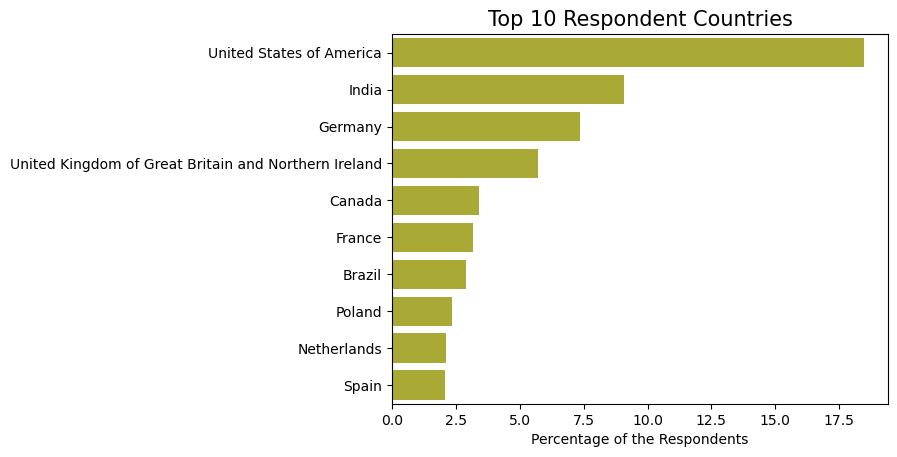

In [121]:
# Create a Series of value counts for the 'Country' column, and divide by the total number of respondents to get the percentage for each country
top10_countries = (df['Country'].value_counts()/(df.shape[0]))*100
# Select only the top 10 countries by percentage of respondents
top10_countries = top10_countries.iloc[:10]
# barplot with the countries on the y-axis and their respective percentages on the x-axis, using a specific color palette
sns.barplot(y=top10_countries.index, x=top10_countries, color=sns.color_palette()[8])
# adding the label for x-axis
plt.xlabel('Percentage of the Respondents')
# adding a title for the plot
plt.title('Top 10 Respondent Countries', fontsize=15);

**The survey included participants from 180 nations and territories. USA, India, and Germany are the three leading nations.**


# **2. Does knowing more number of languages result in higher salaries?**

To answer the above question, we created a scatterplot using a subset of the required columns to analyze the relationship between the number of languages they have worked in and the income they were earning.

In [32]:
# dataframe consisting the required columns to answer our questions
df_sub = df[['Country','MainBranch','Employment','LanguageHaveWorkedWith','LanguageWantToWorkWith','ConvertedCompYearly']]

In [33]:
# defining a function to count the number of languages for each respondent and add it to the dataframe
def count_languages(df, col_name, new_col_name):
    '''
    Adds a new column to the DataFrame indicating the number of languages listed in a semicolon-separated string in a specified column
    
    - df: a dataframe
    - col_name: Name of the column containing the semicolon-separated string values
    - new_col_name: Name of the new column to be added to the dataframe
    '''
    df[new_col_name] = df[col_name].astype(str).str.split(';').apply(len)

In [34]:
# calling count_languages() function for processing required column's count values
count_languages(df_sub,'LanguageHaveWorkedWith', 'lang_worked_count')

In [35]:
# display the first five rows of the subset dataframe to answer our question
df_sub.head()

,Country,MainBranch,Employment,LanguageHaveWorkedWith,LanguageWantToWorkWith,ConvertedCompYearly,lang_worked_count
0,NaN,None of these,NaN,NaN,NaN,NaN,1
1,Canada,I am a developer by profession,"Employed, full-time",JavaScript;TypeScript,Rust;TypeScript,NaN,2
2,United Kingdom of Great Britain and Northern I...,"I am not primarily a developer, but I write co...","Employed, full-time",C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,40205.0,5
3,Israel,I am a developer by profession,"Employed, full-time",C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,215232.0,4
4,United States of America,I am a developer by profession,"Employed, full-time",C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,6


In [36]:
# returns a dataframe with applying mentioned two filters and dropping the missing values in the rows
def filter_data(df,column_name, column_value, column_name_1, column_value_1):
    '''
    Filters the dataframe based on the specified column names and values, and drops any rows containing missing values
    
    Args:
    - df: a dataframe
    - column_name: Name of the first column to apply the filter 
    - column_value: Value to filter on in the specified column
    - column_name_1: Name of the second column to apply the filter
    - column_value_1: Value to filter on in the second column
    
    Returns:
    - dataframe containing only the rows with the applied condition and with missing values dropped
    '''
    return df.query(f" {column_name} == '{column_value}' and {column_name_1} == '{column_value_1}' ").dropna()

We are dropping the null values using the above function because it has no affect on the outcome - in our case, scatterplot.

Hence, those values are not much of use

In [59]:
# applying the filter_data function to filter the dataset for the country United States of America
america = filter_data(df_sub, 'MainBranch', 'I am a developer by profession', 'Country', 'United States of America')

# applying the filter_data function to filter the dataset for the country India
india = filter_data(df_sub, 'MainBranch', 'I am a developer by profession', 'Country', 'India')

# applying the filter_data function to filter the dataset for the country Germany
germany = filter_data(df_sub, 'MainBranch', 'I am a developer by profession', 'Country', 'Germany')

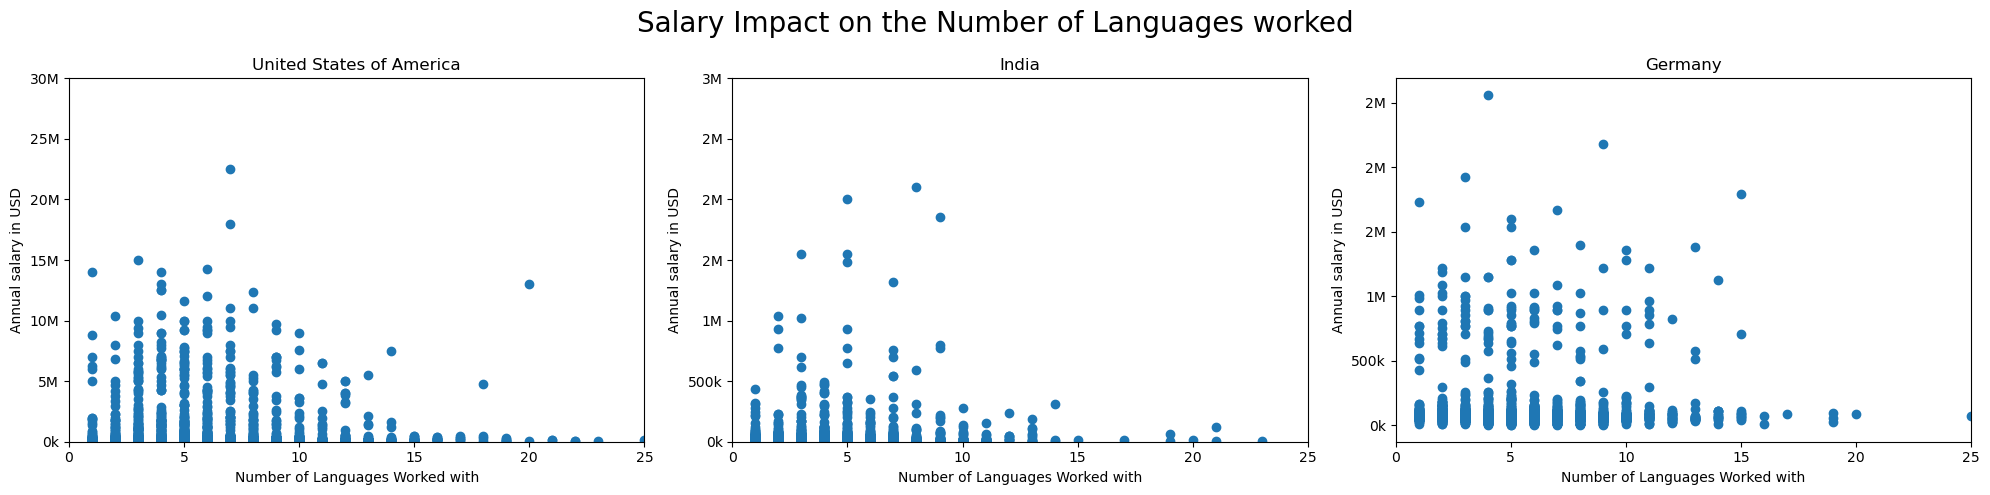

In [116]:
# Create a figure with three subplots
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
# Set the main title for the figure
fig.suptitle('Salary Impact on the Number of Languages worked', fontsize=20)


# Loop through each country and subplot
for ax, country, xlim, ylim in zip(axs, [america, india, germany],[(0,25), (0,25), (0,25)], [(0, 30000000), (0, 3000000), None]):
    # Create a scatter plot of number of languages worked vs. annual salary
    ax.scatter(x=country['lang_worked_count'], y=country['ConvertedCompYearly'])

     # Set the x and y axis labels for the subplot
    ax.set_xlabel('Number of Languages Worked with')
    ax.set_ylabel('Annual salary in USD')

    # Set the x and y axis limits for the subplot
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Format the y-axis tick labels
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_title(country['Country'].unique()[0])
    def format_ticks(x, pos):
        if x >= 1_000_000:
            return f'{x/1_000_000:.0f}M'
        else:
            return f'{x/1_000:.0f}k'
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_ticks))

plt.tight_layout()

**It seems that optimal numbers of languages to know, such as 3 to 7 lead to the maximum wages in all three countries.**

# **3. What are the languages that earned the highest salaries?**

To answer the above question, 

We first use the function 'get_top_20_percent()' on our column "ConvertedCompYearly" which results in a dataframe that yeilds annual salary for  the "Top 20 Percent"

We use the generated dataframe to plot a bar graph for the 3 countries - USA, India, Germany

In [39]:
def get_top_20_percent(df, column_name):
    ''' 
    Filters the dataset to only include the top 20% of values in a specified column
    
    Args:
    - df: a dataframe
    - column_name: Name of the column to filter on
    
    Returns:
    - dataset containing only the top 20% of values in the specified column
    
    '''
    # Sort the values in the specified column in descending order
    sorted_salaries = df[column_name].sort_values(ascending=False)

    # Calculate the value top 20% and covers to int 
    top_20_index = int(len(sorted_salaries) * 0.2)

    # Select the top 20% of values from the sorted column
    top_20_salaries = sorted_salaries[:top_20_index]

    # Filter the dataset to only include rows where the value in the specified column is in the top 20%
    top_20_percent_df = df[df[column_name].isin(top_20_salaries)]
    
    return top_20_percent_df

In [69]:
# applying a function to return the dataframes consisting top 20% salaries for the country United States of America, India and Germany
top_20_percent_america = get_top_20_percent(america, 'ConvertedCompYearly')

top_20_percent_india = get_top_20_percent(india, 'ConvertedCompYearly')

top_20_percent_germany = get_top_20_percent(germany, 'ConvertedCompYearly')

The function 'split_count_prop()' below takes in two arguments - dataframe and column

It returns a dataframe that consists of 3 columns
1) The name of the column
2) The total occurences of a value in the column after splitting it by ';' (because of multiple entries)
3) The proportion of the total counts

In [79]:
def split_count_prop(df, col_name):
    '''
    Args:
    - df: a dataframe
    - col_name: name of the column to return count and proportion

    Returns:
    - returns the count and proportion of each programming language mentioned in the column
    
    '''
    stacked = df[col_name].str.split(';', expand=True).stack().reset_index()
    stacked = stacked.rename(columns={'level_0': 'Resid', 'level_1': 'Num', 0 : 'Language'})
    course_count = stacked['Language'].value_counts().reset_index().rename(columns={'index': 'Name_of_Language', 'Language': 'Count'})
    course_count['Proportion'] = course_count['Count'] / df.shape[0]
    return course_count

In [88]:
# applying a function to return the dataframe with the courses count and their proportion values
top_20_america_courses_count = split_count_prop(top_20_percent_america, 'LanguageHaveWorkedWith')

top_20_india_courses_count = split_count_prop(top_20_percent_india, 'LanguageHaveWorkedWith')

top_20_germany_courses_count = split_count_prop(top_20_percent_germany, 'LanguageHaveWorkedWith')


The function 'plot_top_courses()' below takes 3 arguments - dataframe, n(number of rows), title(for the plot).

It then creates a barplot between the total occurences of a value and its value counts in terms of proportion 

In [111]:
def plot_top_courses(df, n, title):
    '''
    Plots a bar chart of the top n courses in dataset, based on the number of occurrences
    
    Args:
    - df: a dataframe
    - n: Number of top courses to plot
    '''
    top_n_courses_count = df.iloc[:n]
    sns.barplot(data=top_n_courses_count, x='Proportion', y='Name_of_Language', color=sns.color_palette()[4])
    plt.title(title)
    plt.xlabel("Proportion of the Respondents")
    plt.ylabel(None)
    # adjusts the spacing between the subplots
    plt.tight_layout()

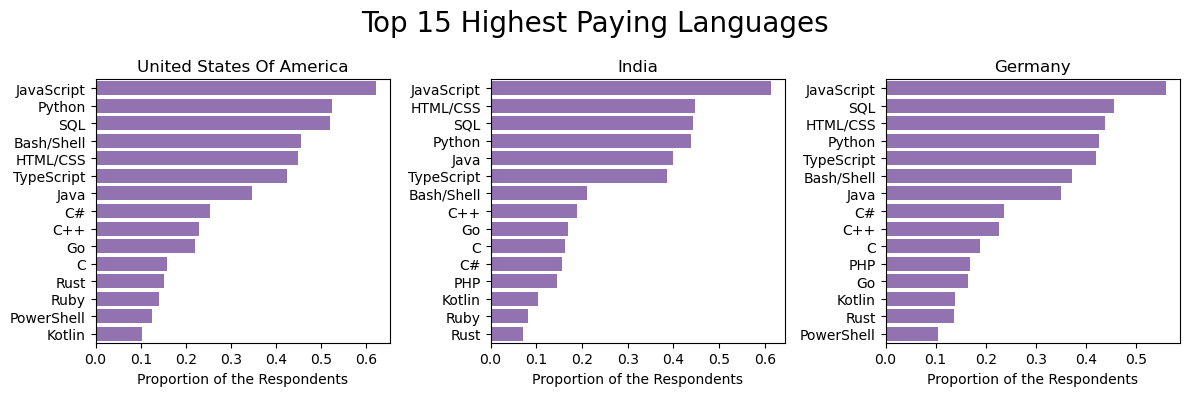

In [112]:
# sets the size of overall figure
plt.figure(figsize=(12, 4))
# adds centered title above the subplots
plt.suptitle('Top 15 Highest Paying Languages', fontsize=20)

# applying a function that plots the top n courses with their proportion values
plt.subplot(1,3,1)
plot_top_courses(top_20_america_courses_count, 15, 'United States Of America')

plt.subplot(1,3,2)
plot_top_courses(top_20_india_courses_count, 15, 'India')

plt.subplot(1,3,3)
plot_top_courses(top_20_germany_courses_count, 15, 'Germany')

**JavaScript topped the survey,  which is around 60% of the highest earning employees for all the three nations.** 

# **4. Are the highest-paying languages in accordance with the rest of the workforce?**

Here we used split_count_prop() and plot_top_courses() functions to check which programming languages are being used by rest of the developers in their respective countries 

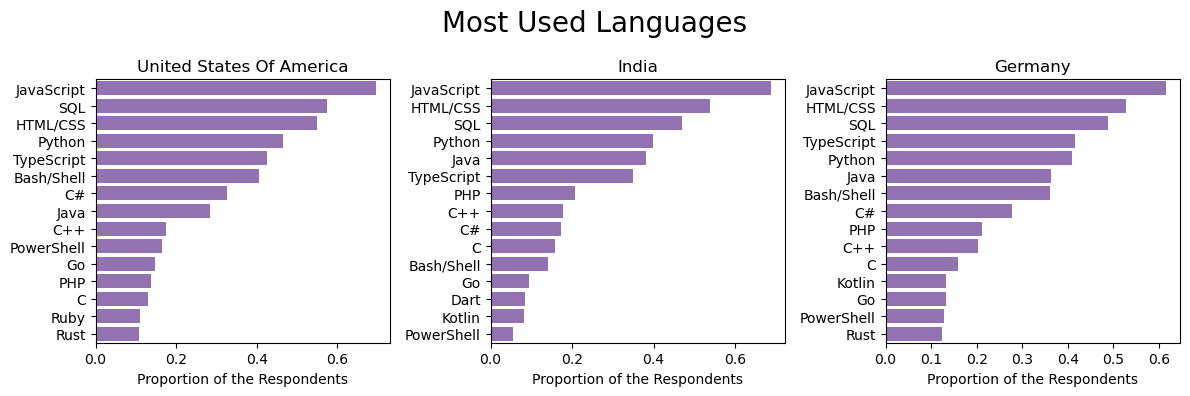

In [113]:
# split_count_prop() - returns the count and proportion of each programming language mentioned in the column
usa_all_lang = split_count_prop(america,'LanguageHaveWorkedWith')
india_all_lang = split_count_prop(india,'LanguageHaveWorkedWith')
germany_all_lang = split_count_prop(germany,'LanguageHaveWorkedWith')

# sets the size of overall figure
plt.figure(figsize=(12, 4))
# adds centered title above the subplots
plt.suptitle('Most Used Languages', fontsize=20)

# creating a subplot with 1 row and 3 columns
#  calling the function plot_top_courses() to plot the bar charts of top 15 languages used in respective countries
plt.subplot(1,3,1)
plot_top_courses(usa_all_lang, 15, 'United States Of America')

plt.subplot(1,3,2)
plot_top_courses(india_all_lang, 15, 'India')

plt.subplot(1,3,3)
plot_top_courses(germany_all_lang, 15, 'Germany')


**We could infer from the above plot, that the most commonly used programming languages in all three countries corresponds to the languages used by higher-income developers.**

# **5. What languages do respondents want to work with in the future?**

We used the same functions split_count_prop() and plot_top_courses() to check which programming languages developers would like to work with in future in their respective countries

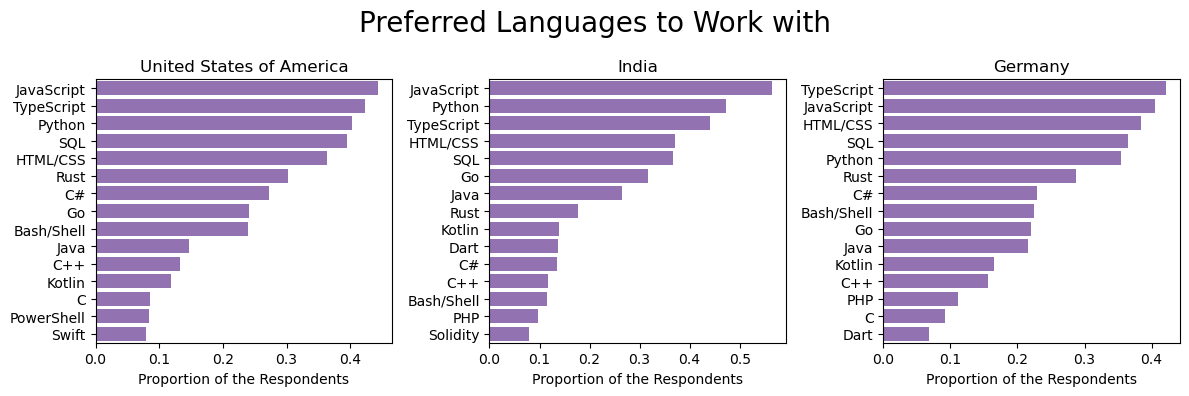

In [114]:
# # split_count_prop() - returns the count and proportion of each programming language mentioned in the column
usa_wantto_work_lang = split_count_prop(america,'LanguageWantToWorkWith')
india_wantto_work_lang = split_count_prop(india,'LanguageWantToWorkWith')
germany_wantto_work_lang = split_count_prop(germany,'LanguageWantToWorkWith')

# sets the size of overall figure
plt.figure(figsize=(12, 4))
# adds centered title above the subplots
plt.suptitle('Preferred Languages to Work with', fontsize=20)

# creating a subplot with 1 row and 3 columns
# calling the function plot_top_courses() to plot the bar charts of top 15 languages want to work with for the respective countries
plt.subplot(1,3,1)
plot_top_courses(usa_wantto_work_lang, 15, 'United States of America')

plt.subplot(1,3,2)
plot_top_courses(india_wantto_work_lang, 15, 'India')

plt.subplot(1,3,3)
plot_top_courses(germany_wantto_work_lang, 15, 'Germany')


**In the United States and India, JavaScript is the primary future-preferred programming language, although in Germany it ranks second.**